# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
city_data_df.tail()

,city,driver_count,type
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural
119,South Saramouth,7,Rural


In [3]:
ride_data_df.tail()

,city,date,fare,ride_id
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298


In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [6]:
#  1. Get the total rides for each city type

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [7]:
# 2. Get the total drivers for each city type
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).sum()["driver_count"]
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]

In [8]:
#  3. Get the total amount of fares for each city type
urban_total_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_total_fare.head()
suburban_total_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_total_fare = rural_cities_df.groupby(["city"]).sum()["fare"]

In [9]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare_byride = urban_total_fare / urban_ride_count
suburban_avg_fare_byride = suburban_total_fare / suburban_ride_count
rural_avg_fare_byride = rural_total_fare / rural_ride_count

In [10]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_bydriver = urban_total_fare / urban_driver_count
suburban_avg_fare_bydriver = suburban_total_fare / suburban_driver_count
rural_avg_fare_bydriver = rural_total_fare / rural_driver_count

In [11]:
city_data_df.groupby(city_data_df['type']).driver_count.sum()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
summary_rides_ds = pyber_data_df.groupby(pyber_data_df['type']).ride_id.count()
summary_drivers_ds = city_data_df.groupby(city_data_df['type']).driver_count.sum()
summary_fares_ds = pyber_data_df.groupby(pyber_data_df['type']).fare.sum()
summary_fares_ds / summary_drivers_ds

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
#  6. Create a PyBer summary DataFrame. 

summary_rides_ds = pyber_data_df.groupby(pyber_data_df['type']).ride_id.count()
summary_drivers_ds = city_data_df.groupby(city_data_df['type']).driver_count.sum()
summary_fares_ds = pyber_data_df.groupby(pyber_data_df['type']).fare.sum()
summary_avg_farebyride = summary_fares_ds / summary_rides_ds
summary_avg_farebydriver = summary_fares_ds / summary_drivers_ds

pyber_summary_df = pd.DataFrame({'Total Rides' : summary_rides_ds, 
                                  'Total Drivers' : summary_drivers_ds,
                                  'Total Fares' : summary_fares_ds,
                                  'Average Fare per Ride' : summary_avg_farebyride,
                                  'Average Fare per Driver' : summary_avg_farebydriver
                                 })


pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
#  6. Create a PyBer summary DataFrame. 

summary_rides_ds = pyber_data_df.groupby(pyber_data_df['type']).ride_id.count()
summary_drivers_ds = city_data_df.groupby(city_data_df['type']).driver_count.sum()
summary_fares_ds = pyber_data_df.groupby(pyber_data_df['type']).fare.sum()
summary_avg_farebyride = summary_fares_ds / summary_rides_ds
summary_avg_farebydriver = summary_fares_ds / summary_drivers_ds

pyber_summary_df = pd.DataFrame({'Total Rides' : summary_rides_ds.map('{:,.0f}'.format), 
                                  'Total Drivers' : summary_drivers_ds.map('{:,.0f}'.format),
                                  'Total Fares' : summary_fares_ds.map('${:,.2f}'.format),
                                  'Average Fare per Ride' : summary_avg_farebyride.map('${:,.2f}'.format),
                                  'Average Fare per Driver' : summary_avg_farebydriver.map('${:,.2f}'.format)
                                 })


pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [15]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
#  8. Format the columns.
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_fares = pyber_data_df.groupby(['type' , 'date']).fare.sum()

sum_fares

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [21]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

sum_fares = sum_fares.reset_index()

sum_fares


,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,43.69
1,1,Rural,2019-01-02 11:18:32,52.12
2,2,Rural,2019-01-03 19:51:01,19.90
3,3,Rural,2019-01-04 03:31:26,24.88
4,4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...,...
2370,2370,Urban,2019-05-08 04:20:00,21.99
2371,2371,Urban,2019-05-08 04:39:49,18.45
2372,2372,Urban,2019-05-08 07:29:01,18.55
2373,2373,Urban,2019-05-08 11:38:35,19.77


In [22]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.

sum_fares_pivot_df = pd.pivot_table(sum_fares, index='date', columns = 'type', values ='fare')

sum_fares_pivot_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77
2019-05-08 13:10:18,NaN,NaN,18.04


In [23]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

Q12019_df = sum_fares_pivot_df.loc['2019-01-01':'2019-04-28']

Q12019_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

Q12019_df.index = pd.to_datetime(Q12019_df.index)


In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
Q12019_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

Q12019_df = Q12019_df.resample('W').sum()

Q12019_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


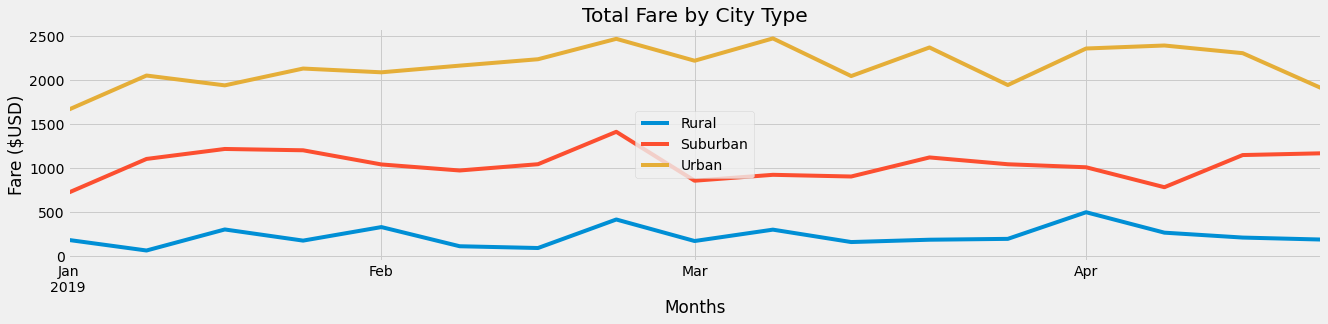

In [33]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,4))
Q12019_df.plot(ax = ax)

ax.set_title('Total Fare by City Type')
ax.set_xlabel('Months')
ax.set_ylabel('Fare ($USD)')

ax.legend(loc='center')
plt.savefig('analysis/PyBer_fare_summary.png')
plt.show()
